# MNIST with Neural Networks

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

2024-12-12 15:34:22.677082: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
from sklearn.model_selection import train_test_split

# separate X_train_full into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=25)

In [9]:
# check the shapes for X_train, X_validation, X_test

print(f"X_train: {X_train.shape} \n X_validation: {X_validation.shape} \n X_test: {X_test.shape}")
print(f"y_train: {y_train.shape} \n y_validation: {y_validation} \n y_test: {y_test.shape}")

X_train: (48000, 28, 28) 
 X_validation: (12000, 28, 28) 
 X_test: (10000, 28, 28)
y_train: (48000,) 
 y_validation: [9 7 8 ... 3 7 4] 
 y_test: (10000,)


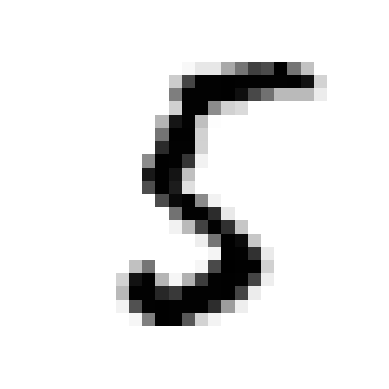

In [12]:
# plot a few digits
import matplotlib.pyplot as plt

plt.imshow(X_train[45], cmap="binary")
plt.axis('off')
plt.show()

In [25]:
# Create a normalisation layer
normalisation_layer = tf.keras.layers.Normalization(axis=-1)
normalisation_layer.adapt(X_train)  # Compute the mean and variance from the training data

model = tf.keras.models.Sequential([
    normalisation_layer,
    tf.keras.layers.Flatten(input_shape=[28,28]), # receives input data and converts it to 1d array
    tf.keras.layers.Dense(300, activation="relu"), # dense layer with 300 neurons
    tf.keras.layers.Dense(100, activation="relu"), # second dense layer with 100 neurons
    tf.keras.layers.Dense(10, activation="softmax") #output layer, with 10 nodes, as 10 classes, softmax because multiclass
])

# implement early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=15,  #determines how many epochs will run before early stopping
                                                     restore_best_weights=True)

# implement TensorBoard
tensorboard_cb = tf.keras.callbacks.TensorBoard("mnist_board")

# implement checkpoint to keep only the best model
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("mnist_model.keras", save_best_only=True)


#implement optmiser
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# compile the model
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])


history = model.fit(X_train,y_train, 
    validation_data=(X_validation, y_validation), epochs=100,
    callbacks=[early_stopping_cb, tensorboard_cb, checkpoint_cb])

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4991 - loss: 1.6194 - val_accuracy: 0.8510 - val_loss: 0.5791
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8624 - loss: 0.5148 - val_accuracy: 0.8925 - val_loss: 0.4000
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8983 - loss: 0.3668 - val_accuracy: 0.9067 - val_loss: 0.3390
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9087 - loss: 0.3208 - val_accuracy: 0.9162 - val_loss: 0.3059
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9181 - loss: 0.2837 - val_accuracy: 0.9213 - val_loss: 0.2843
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9261 - loss: 0.2559 - val_accuracy: 0.9260 - val_loss: 0.2678
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9301 - loss: 0.2462 - val_accuracy: 0.9299 - val_loss: 0.2554
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9337 -

In [28]:
# restore best model
model = tf.keras.models.Model("mnist_model.keras")

model.evaluate(X_test, y_test)

TypeError: Layer.__init__() takes 1 positional argument but 2 were given